In [ ]:
import pathlib
import glob
import re
import pprint
import pandas as pd
import os
from tqdm import tqdm
import codecs
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import collections

In [ ]:
p_temp = pathlib.Path('../../dataset/')

In [ ]:
pprint.pprint(list(p_temp.iterdir()))

[WindowsPath('../../dataset/idol_id.csv')]


In [ ]:
idol_data_path = '../../dataset/'
twitter_data_path = '../../TwitterData/'

# アイドルのIDデータを読み込む

In [ ]:
df = pd.read_csv(idol_data_path+'idol_id.csv')

In [ ]:
df.head(100)

,id,screen_name
0,818326171880341504,aizome_karen
1,1245736739919941633,yuraneko_
2,1086770060,peroperorinko01
3,1109751762733301760,nekomataokayu
4,747745043725815808,okada_ayame
5,1109748792721432577,inugamikorone
6,1133215093246664706,usadapekora
7,72809395,eitaso
8,1964755448,arimuraairi
9,1270386719808839681,yanemintchan


In [ ]:
id_list = df.values.tolist()
id_list = ([r[0] for r in id_list])

In [ ]:
print(id_list)

[818326171880341504, 1245736739919941633, 1086770060, 1109751762733301760, 747745043725815808, 1109748792721432577, 1133215093246664706, 72809395, 1964755448, 1270386719808839681, 1355780078286725121, 782993407656374273, 719821086527893505]


# ツイートデータを読み込む

In [ ]:
json_open = open(twitter_data_path+"/2021-12-07.json", 'r',encoding="utf-8")
base = pd.read_json(json_open,orient='records')

In [ ]:
result = pd.DataFrame(columns=['id','text'])

# アイドルIDリストを使ってアイドルのツイートDataFrameを作る


In [ ]:
for index, row in base.iterrows():
    text = row[0]['text']
    id = row[0]['user']['id']
    if id in id_list:
        print(row[0]['user']['name'])
        result = result.append({ 'id':id,'text':text},ignore_index=True)
    

ゆら猫💚🐈‍⬛
ゆら猫💚🐈‍⬛
ゆら猫💚🐈‍⬛
ぺろりん先生 (鹿目凛)
藍染カレン
ぺろりん先生 (鹿目凛)
岡田 彩夢@虹のコンキスタドール
有村藍里
小鳩りあ(こばとりあ)
岡田 彩夢@虹のコンキスタドール
眠森ペティ📔🗝️
岡田 彩夢@虹のコンキスタドール
小鳩りあ(こばとりあ)
蛭田 愛梨@虹のコンキスタドール
兎田ぺこら👯‍♀️ホロライブ3期生
ゆら猫💚🐈‍⬛
ぺろりん先生 (鹿目凛)
ぺろりん先生 (鹿目凛)
猫又おかゆ🍙
蛭田 愛梨@虹のコンキスタドール
小鳩りあ(こばとりあ)
蛭田 愛梨@虹のコンキスタドール
岡田 彩夢@虹のコンキスタドール
戌神ころね🥐
蛭田 愛梨@虹のコンキスタドール
兎田ぺこら👯‍♀️ホロライブ3期生
蛭田 愛梨@虹のコンキスタドール
マキシマムえいたそ☆成瀬瑛美
有村藍里
蛭田 愛梨@虹のコンキスタドール
蛭田 愛梨@虹のコンキスタドール
眠森ペティ📔🗝️
眠森ペティ📔🗝️
ゆるいやね
ゆるいやね
眠森ペティ📔🗝️
小鳩りあ(こばとりあ)
蛭田 愛梨@虹のコンキスタドール


In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
id      38 non-null object
text    38 non-null object
dtypes: object(2)
memory usage: 688.0+ bytes


# ディレクトリ内のデータ全部に適応
ディレクトリ内のファイル名のみ一覧を取得し、それで回していく。


In [ ]:
files = os.listdir(twitter_data_path)
files_file = [f for f in files if os.path.isfile(os.path.join(twitter_data_path, f))]
print(files_file)

['2020-09-13.json', '2020-09-14.json', '2020-09-15.json', '2020-09-16.json', '2020-09-17.json', '2020-09-18.json', '2020-09-19.json', '2020-09-20.json', '2020-09-21.json', '2020-09-22.json', '2020-09-23.json', '2020-09-24.json', '2020-09-25.json', '2020-09-26.json', '2020-09-27.json', '2020-09-28.json', '2020-09-29.json', '2020-09-30.json', '2020-10-01.json', '2020-10-02.json', '2020-10-03.json', '2020-10-04.json', '2020-10-05.json', '2020-10-06.json', '2020-10-07.json', '2020-10-08.json', '2020-10-09.json', '2020-10-11.json', '2020-10-12.json', '2020-10-13.json', '2020-10-14.json', '2020-10-15.json', '2020-10-19.json', '2020-10-20.json', '2020-10-21.json', '2020-10-22.json', '2020-10-23.json', '2020-10-24.json', '2020-10-25.json', '2020-10-26.json', '2020-10-27.json', '2020-10-28.json', '2020-10-29.json', '2020-10-30.json', '2020-10-31.json', '2020-11-02.json', '2020-11-03.json', '2020-11-04.json', '2020-11-05.json', '2020-11-06.json', '2020-11-07.json', '2020-11-08.json', '2020-11-09

In [44]:
result = pd.DataFrame(columns=['id','text'])

for file_name in (files_file):
    with codecs.open(twitter_data_path+file_name, "r", "utf-8", "ignore") as file:
        base = pd.read_json(file,orient='records')
    for index, row in base.iterrows():
        text = row[0]['text']
        id = row[0]['user']['id']
        if id in id_list:
            result = result.append({ 'id':id,'text':text},ignore_index=True)


In [45]:
result.head()

,id,text
0,719821086527893505,え！？あのスクランブル交差点から見えるあれ！？うおおおお！！！！！！ https://t.c...
1,719821086527893505,アーカイブ見てるんですけどサイゼの「当たり前にシェアして〜」のまとばせんぱいの顔でめちゃめち...
2,719821086527893505,#虹コンサマワン0912
3,719821086527893505,そうだったんですね！😳これからは毎回チェックしちゃお〜🤟🤟🤟 https://t.co/ym...
4,719821086527893505,やまとぱいせんのウインク可愛すぎません？？え、かわよ\n #虹コンサマワン0912


In [46]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11854 entries, 0 to 11853
Data columns (total 2 columns):
id      11854 non-null object
text    11854 non-null object
dtypes: object(2)
memory usage: 185.3+ KB


# URLなど余計なテキストを取り除く

In [47]:
def format_text(text):
    '''
    MeCabに入れる前のツイートの整形方法例
    '''
    text = re.sub(r' ', '\n', text)
    text = re.sub(r'https?://[\w/:%#\$&\?\(\)~\.=\+\-…]+', "", text)
    text = re.sub('RT', "", text)
    text = re.sub('お気に入り', "", text)
    text = re.sub('まとめ', "", text)
    #ハッシュタグの検出のため、¥n#にしてから抜いていく
    text = re.sub(r'#', '\n#', text)
    text = re.sub(r'(\A|\n|[ -/:-@\[-~]|\s)#.+(\n|[ -/:-@\[-~]|\Z|\s)', "", text) #ハッシュタグは別で入れるのでここでは消していたい
    #同じようにして@ユーザー名も消したい
    text = re.sub(r'(\A|\n|[ -/:-@\[-~]|\s)@.+(\n|[ -/:-@\[-~]|\Z|\s)', "", text)
    #text = re.sub(r'[ -/:-@\[-~]', "", text)  # 半角記号
    #text = re.sub(r'[︰-＠]', "", text)  # 全角記号
    text = re.sub('\n', " ", text)  # 改行文字

    return text

In [48]:
format_idoldf = result
for index,row in format_idoldf.iterrows():
    format_idoldf.loc[index]['text'] = format_text(row['text'])

In [49]:
format_idoldf.tail()

,id,text
11849,1133215093246664706,トリトドンとは和解しました。 レジェンドが思いのほか可愛い✨✨
11850,1133215093246664706,近々あつ森で視聴者さんの島を侵略しにいきたいぺこだからみんないい感じの準備をしておいてほしい...
11851,1355780078286725121,作業やだああああああああ 作業がんばるうううううう
11852,1355780078286725121,配信見てくれた君達 これからアーカイブを見てくれる君達！ おつペティよっ♡ˎˊ˗ 予定より...
11853,1355780078286725121,歌枠後半インターフェイスの切り替え間違えて音が遅延してる恥ずかちい…ぴえん🥺


# Mecabで形態素解析
### パターン１

In [50]:
import MeCab

# 取り出したい品詞
select_conditions = ['動詞', '形容詞', '名詞']

# 分かち書きオブジェクト
tagger = MeCab.Tagger('')

# Neologdの指定版 最新語に対応する
# tagger = MeCab.Tagger('-d /usr/lib64/mecab/dic/mecab-ipadic-neologd')

# 安定するらしい
tagger.parse('')


def wakati_text(text):
    """
    文書textを分かち書きして、半角スペース区切りの単語文字列に変換する

    Parameters
    ----------
    text: str
        文書

    Returns
    -------
    text_result: str
        分かち書きされた文書

    """

    # 分けてノードごとにする
    node = tagger.parseToNode(text)
    terms = []

    while node:

        # 単語
        term = node.surface

        # 品詞
        pos = node.feature.split(',')[0]

        # もし品詞が条件と一致してたら
        if pos in select_conditions:
            terms.append(term)

        node = node.next

    # 連結おじさん
    text_result = ' '.join(terms)
    return text_result


text = "私はプログラミングが苦手です"

'''
私 プログラミング 苦手
'''
print(wakati_text(text))


私 プログラミング 苦手


### パターン２

In [81]:
def mecab_analysis(text):
    t = MeCab.Tagger('')
    t.parse('')
    #enc_text = text.encode('utf-8') 
    node = t.parseToNode(text) 
    output = []
    while(node):
        if node.surface != "":  # ヘッダとフッタを除外
            word_type = node.feature.split(",")[0]
            if (word_type in ["名詞"]) & (len(node.surface)>1):
                output.append(node.surface)
        node = node.next
        if node is None:
            break
    return output

### 単語の頻出回数を見る
mecabで形態素解析して、出てきた形容詞動詞名詞をlistに保存する。そのlistの要素の出現回数を数える。

In [82]:
#テキストとユーザーIDのDataFrameからテキストを全部一つの文にする
all_text=''
for index,row in format_idoldf.iterrows():
    all_text = all_text + row['text']

print(all_text[0:100])

え！？あのスクランブル交差点から見えるあれ！？うおおおお！！！！！！ アーカイブ見てるんですけどサイゼの「当たり前にシェアして〜」のまとばせんぱいの顔でめちゃめちゃ笑ってしまった😂😂😂  そうだったん


In [83]:
#全文を形態素解析する
word_list = mecab_analysis(all_text)
print(word_list[0:100])

['スクランブル', '交差点', 'あれ', 'アーカイブ', 'サイゼ', '当たり前', 'シェア', '〜」', 'ぱいの', 'めちゃめちゃ', '毎回', 'チェック', 'やまと', 'ぱいせんの', 'ウインク', 'みんな', 'ツイート', 'スクランブル', '交差点', 'ところ', 'MV', '実現', 'なに', 'これ', '最高', 'コン', 'みんな', 'たち', '投稿', 'リアルタイム', 'スキ', '写真', '素敵', '写真', '盛り沢山', 'ナタリー', 'さん', '今日', 'フラゲ', 'みんな', 'もと', 'CD', '渋谷', 'スクランブル', '交差点', '巨大', 'モニター', 'MV', 'タワレコ', '難波', 'さん', '今日', '岡田', 'イベント', 'アクスタケース', 'ポップ', '全員', 'サイン', 'ポスター', '等身', 'パネル', '展示', '是非', '\u200d♀', 'コン', 'コーナー', 'めちゃめちゃ', '素敵', '本日', 'フラゲ', '持ち帰り', 'アイス', 'コーヒー', '見栄', '牛乳', 'ジャバジャバ', 'コーヒー', '牛乳', '親子', 'オフショ', '等身', 'パネル', 'そう', '勢い', '今日', '20', '00', 'FMFUJI', 'りこ', 'こちら', 'ツイキャス', 'radiko', '投稿', 'MIYU', '404', '^._.^', 'ゃんこ', 'パンサー', 'さん', 'マジ']


In [84]:
#出現回数をカウント
c = collections.Counter(word_list)
count_word_list = (c.most_common())

# WordCloudで頻度を可視化

In [85]:
fpath = "../../tenhamasenfont/TenhamasenFontVer.2-Regular.otf"

In [86]:
def show_word_cloud(ws):

    # 環境に合わせてフォントのパスを指定する。
    #fpath = "/System/Library/Fonts/HelveticaNeue-UltraLight.otf"
    ws_show = []
    for i in range(len(ws)):
        word_times = ws[i][1]
        if word_times>0:
            for j in range(word_times):
                ws_show.append(ws[i][0])
    # 綺麗に整列してると、「あああ あああ」という単語と判断されるので、シャッフル
    random.shuffle(ws_show)
    # スペース区切りにする
    texts = ' '.join(ws_show)

    # ストップワードの設定
    stop_words = [ u'てる', u'いる', u'なる', u'れる', u'する', u'ある', u'こと', u'これ', u'さん', u'して', \
             u'くれる', u'やる', u'くださる', u'そう', u'せる', u'した',  u'思う',  \
             u'それ', u'ここ', u'ちゃん', u'くん', u'', u'て',u'に',u'を',u'は',u'の', u'が', u'と', u'た', u'し', u'で', \
             u'ない', u'も', u'な', u'い', u'か', u'ので', u'よう', u'', u'なっ', u'あと', u'今日', u'ころ',\
             u'ちゃっ', u'くれ', u'明日',  ]

    wordcloud = WordCloud(background_color="white", font_path=fpath, width=900, height=500, \
                          stopwords=set(stop_words)).generate(texts)

    plt.figure(figsize=(15,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

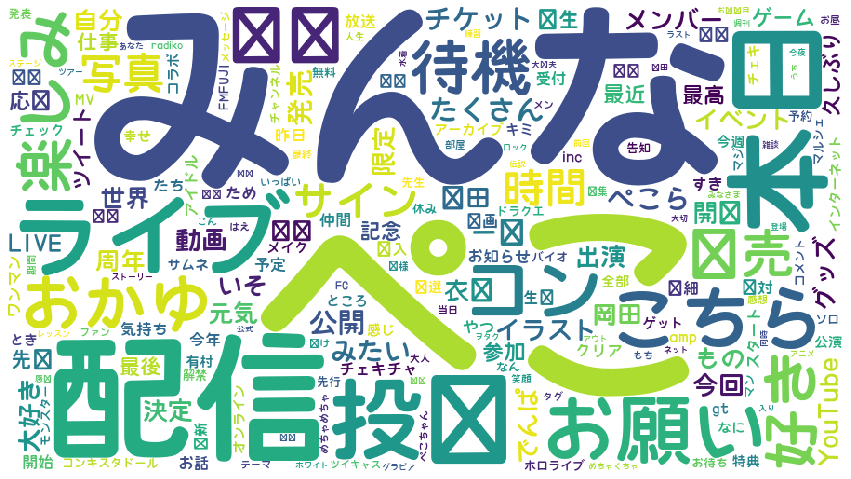

In [87]:
words = [['あああ', 100], ['いいい', 80], ['ううう', 40], 
         ['えええ', 10], ['おおお',2]]

show_word_cloud(count_word_list)